## L1 (Lasso) and L2 (Ridge) Regularization

Regularization is a technique that prevents the parameters of a model from becoming too large, and "shrinks" them towards zero. The impact of regularization is that it results in models that, when making predictions on new data, have less variance.

Three particularly well-known and commonly used regularization techniques for linear models are:
* ridge regression
* least absolute shrinkage and selection operator (LASSO)
* elastic net

These three techniques can be thought of as extensions to linear models that reduce overfitting. Because they shrink model parameters towards zero, they can also automatically perform feature selection by forcing predictors with little information to have no or negligible impact on predictions.

### Examples of Underfit vs. Optimal vs. Overfit

When we underfit the data, we miss local differences in relationship and produce a model that has high bias.

When we overfit the data, our model is too sensitive to local differences in the relationship and produce a model that has high variance.

![Underfit Optimal Overfit](./images/underfit-optimal-overfit.png)
![Underfit Optimal Overfit 2](./images/underfit-optimal-overfit2.png)

The principal job of regularization is to prevent algorithms from learning models that are overfit by discouraging complexity. This is achieved by penalizing model parameters that are large, shrinking them towards zero.

### Ridge Regression

In ridge regression, the cost function for OLS is altered by adding a penalty equivalent to square of the magnitude of the parameters (coefficients). The added term makes the function's value larger, the larger the coefficient estimates are. As a result, in order to minimize the output of the cost function, optimization algorithm has to balance selecting the model parameters that minimze the sum of squares, and selecting parameters that minimize the penalty term.

__Note!__ Intercept is excluded from the regularization term.

$$\Large J(W)=\sum^M_{i=1}(y_i-\hat{y_i})^2+\lambda\sum^p_{j=1}{w_j^2}$$

The penalty term is controlled by value __lambda__, $\lambda$. Large values of lambda strongly penalize model complexity, while small values of lambda weakly penalize model complexity. If we set lambda to 0, this removes the L2 penalty term from the equation and we get back to the OLS loss function.

### LASSO

The cost function for LASSO can be written as

$$\Large J(W)=\sum^M_{i=1}(y_i-\hat{y_i})^2+\lambda\sum^p_{j=1}{\lvert{w_j}\rvert}$$

L1 regularization can lead to zero coefficients. So LASSO regression not only helps in reducing over-fitting but it helps with feature selection.

__Note!__ Do not use L1 or L2 regularization for univariate regressions.

<img src="https://miro.medium.com/max/1198/1*Jd03Hyt2bpEv1r7UijLlpg.png"></img>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm

In [2]:
boston = load_boston()

In [3]:
data = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [4]:
data['MEDV'] = boston.target

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
correlations = data.corr()

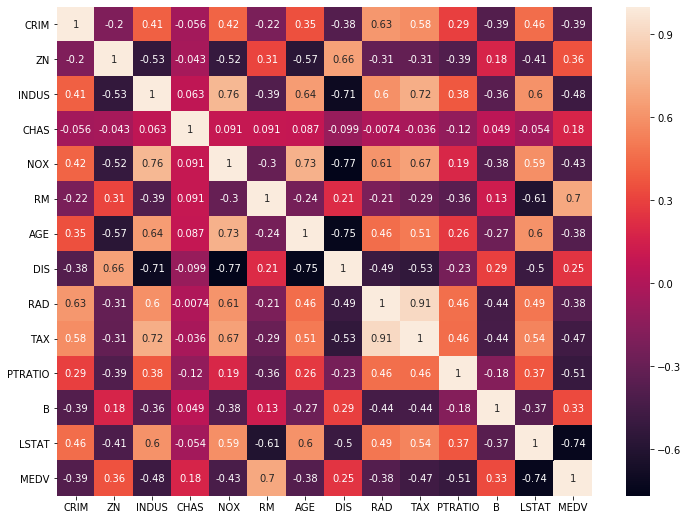

In [7]:
plt.figure(figsize=(12, 9))
sns.heatmap(correlations, annot=True)

In [8]:
x = data.drop(['MEDV'], axis=1)

In [9]:
y = data['MEDV']

In [10]:
results = sm.OLS(y, sm.add_constant(x)).fit()

c:\users\ernest.daraska\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        12:10:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## Ridge Regression

In [12]:
cols = x.columns.tolist()
cols.append('R2')

In [13]:
ridge_coefs = pd.DataFrame(data=[], columns=cols)

In [14]:
alphas = [10, 1, 0.01, 0.0001]
index = []
for a in alphas:
    rr = Ridge(a).fit(x, y)
    ridge_coefs = ridge_coefs.append(pd.DataFrame(data=[np.append(rr.coef_, rr.score(x, y))], columns=cols))
    index.append(r'Ridge $\alpha$={}'.format(a))

ridge_coefs.index = index

In [15]:
ridge_coefs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,R2
Ridge $\alpha$=10,-0.101435,0.049579,-0.042962,1.952021,-2.371619,3.702272,-0.010707,-1.248808,0.279596,-0.013993,-0.797945,0.010037,-0.559366,0.731574
Ridge $\alpha$=1,-0.104595,0.047443,-0.008805,2.552393,-10.777015,3.854000,-0.005415,-1.372654,0.290142,-0.012912,-0.876074,0.009673,-0.533343,0.738870
Ridge $\alpha$=0.01,-0.107954,0.046436,0.020076,2.685010,-17.652142,3.810767,0.000590,-1.473880,0.305781,-0.012344,-0.951478,0.009318,-0.524885,0.740642
Ridge $\alpha$=0.0001,-0.108011,0.046421,0.020554,2.686717,-17.765459,3.809874,0.000691,-1.475550,0.306047,-0.012335,-0.952734,0.009312,-0.524760,0.740643


Text(0, 0.5, '$R^2$')

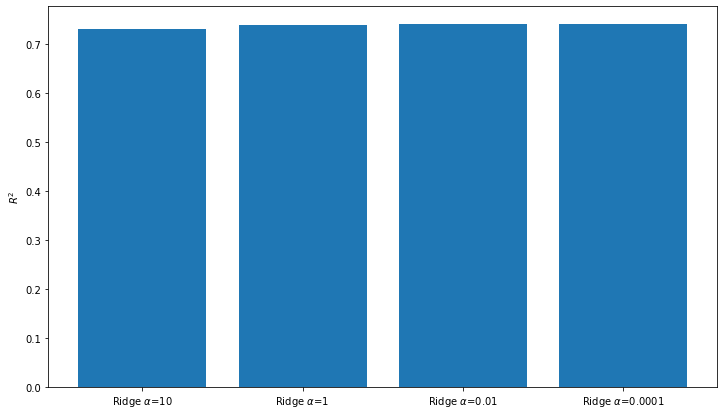

In [16]:
plt.figure(figsize=(12, 7))
plt.bar(ridge_coefs.index, ridge_coefs['R2'])
plt.ylabel(r'$R^2$') # R-squared

Text(0, 0.5, '# of features selected')

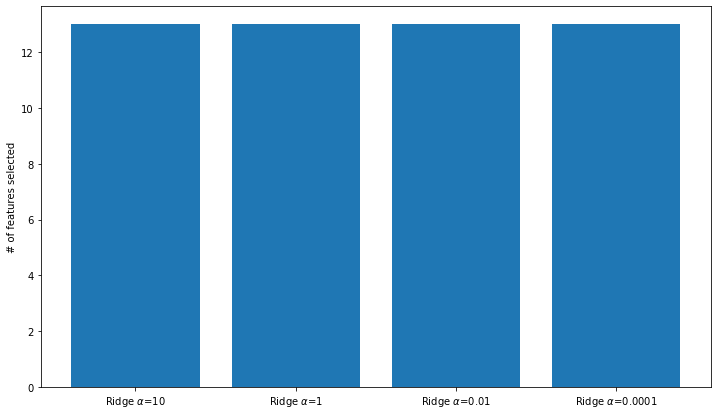

In [17]:
plt.figure(figsize=(12, 7))
plt.bar(ridge_coefs.index, (ridge_coefs != 0).sum(axis=1) - 1)
plt.ylabel('# of features selected')

## Lasso Regression

In [18]:
lasso_coefs = pd.DataFrame(data=[], columns=cols)

In [19]:
alphas = [10, 1, 0.01, 0.0001]
index = []
for a in alphas:
    ls = Lasso(a).fit(x, y)
    lasso_coefs = lasso_coefs.append(pd.DataFrame(data=[np.append(ls.coef_, ls.score(x, y))], columns=cols))
    index.append(r'Lasso $\alpha$={}'.format(a))

lasso_coefs.index = index

In [20]:
lasso_coefs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,R2
Lasso $\alpha$=10,-0.000000,0.026146,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.009282,-0.000000,0.007496,-0.564038,0.523363
Lasso $\alpha$=1,-0.063437,0.049165,-0.000000,0.000000,-0.000000,0.949811,0.020910,-0.668790,0.264206,-0.015212,-0.722966,0.008247,-0.761115,0.682584
Lasso $\alpha$=0.01,-0.106228,0.046860,0.006474,2.504190,-14.394478,3.814186,-0.001818,-1.422155,0.298526,-0.012627,-0.916369,0.009485,-0.530481,0.740210
Lasso $\alpha$=0.0001,-0.107994,0.046425,0.020418,2.684911,-17.732827,3.809914,0.000666,-1.475036,0.305974,-0.012338,-0.952383,0.009313,-0.524815,0.740643


Text(0, 0.5, '$R^2$')

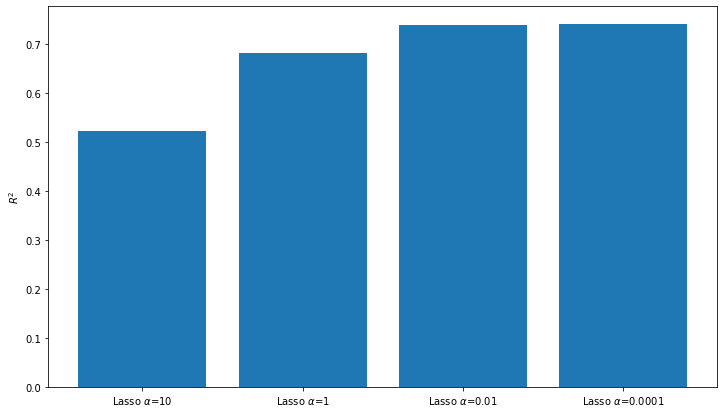

In [21]:
plt.figure(figsize=(12, 7))
plt.bar(lasso_coefs.index, lasso_coefs['R2'])
plt.ylabel(r'$R^2$') # R-squared

Text(0, 0.5, '# of features selected')

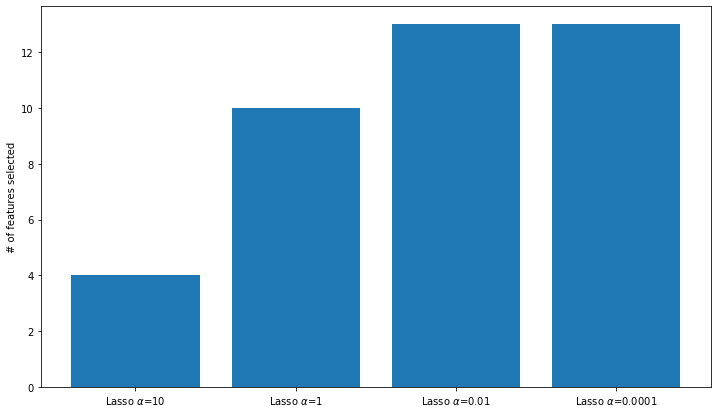

In [22]:
plt.figure(figsize=(12, 7))
plt.bar(lasso_coefs.index, (lasso_coefs != 0).sum(axis=1) - 1)
plt.ylabel('# of features selected')

### Running regression with selected features

In [23]:
selected_features = lasso_coefs.columns[lasso_coefs.iloc[1] != 0].tolist()
selected_features.remove('R2')

In [24]:
selected_features

['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [25]:
results = sm.OLS(y, sm.add_constant(x[selected_features])).fit()

c:\users\ernest.daraska\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     130.1
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          1.30e-131
Time:                        12:10:40   Log-Likelihood:                -1514.1
No. Observations:                 506   AIC:                             3050.
Df Residuals:                     495   BIC:                             3097.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8975      4.358      5.484      0.0

In [27]:
selected_features.remove('AGE')

In [28]:
results = sm.OLS(y, sm.add_constant(x[selected_features])).fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     144.4
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          1.85e-132
Time:                        12:10:41   Log-Likelihood:                -1514.7
No. Observations:                 506   AIC:                             3049.
Df Residuals:                     496   BIC:                             3092.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4831      4.341      5.410      0.0